# Assignment 06
# Blandon Lee

Assignment 6.1

In [40]:
from keras import layers
from keras import models
import pandas as pd
from keras.datasets import mnist
from keras.utils import to_categorical
import os, shutil
from keras.datasets import cifar10

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),
                        activation='relu',
                        input_shape=(28, 28, 1)
                       )) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [43]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [45]:
#Training the model

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [46]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 43s 40ms/step - loss: 0.1740 - accuracy: 0.9448
Epoch 2/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0456 - accuracy: 0.9856
Epoch 3/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0316 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0237 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0186 - accuracy: 0.9943


In [47]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

test_acc

313/313 [==============================] - 4s 9ms/step - loss: 0.0310 - accuracy: 0.9919


0.9919000267982483

In [51]:
# Saving the model

model.save('6.1_model_imag.h5')

Assignment 6.2

In [52]:
import keras
import matplotlib.pyplot as plt

In [53]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 2, 2, 128)       

In [55]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [56]:
train_images.shape
test_images.shape

(10000, 32, 32, 3)

In [57]:
train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [58]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 47s 57ms/step - loss: 1.6236 - accuracy: 0.4154 - val_loss: 1.5318 - val_accuracy: 0.4631
Epoch 2/10
782/782 [==============================] - 44s 56ms/step - loss: 1.1861 - accuracy: 0.5832 - val_loss: 1.1514 - val_accuracy: 0.6019
Epoch 3/10
782/782 [==============================] - 44s 56ms/step - loss: 0.9861 - accuracy: 0.6539 - val_loss: 1.3818 - val_accuracy: 0.5481
Epoch 4/10
782/782 [==============================] - 44s 56ms/step - loss: 0.8525 - accuracy: 0.7025 - val_loss: 0.9170 - val_accuracy: 0.6845
Epoch 5/10
782/782 [==============================] - 44s 56ms/step - loss: 0.7461 - accuracy: 0.7405 - val_loss: 1.1001 - val_accuracy: 0.6173
Epoch 6/10
782/782 [==============================] - 44s 57ms/step - loss: 0.6536 - accuracy: 0.7717 - val_loss: 0.9054 - val_accuracy: 0.6946
Epoch 7/10
782/782 [==============================] - 44s 57ms/step - loss: 0.5718 - accuracy: 0.8008 - val_loss: 0.8589 - val_accuracy:

In [59]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 4s 13ms/step - loss: 1.0829 - accuracy: 0.7090


0.7089999914169312

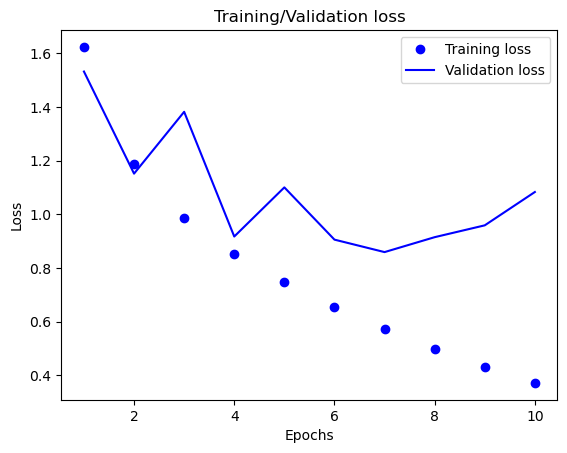

In [60]:
history_dict = history.history
loss_values = history_dict['loss']
accuracy = history_dict['accuracy']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training/Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

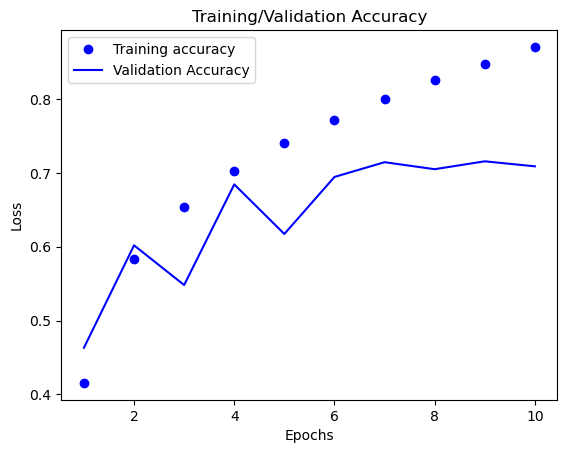

In [61]:
# Training/Validation accuracy

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training/Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Assignment 6.3

In [62]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [63]:
model = ResNet50(weights='imagenet')

img_path = 'NOAA-Image.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)



print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 3s 3s/step
Predicted: [('n04592741', 'wing', 0.69426996), ('n09468604', 'valley', 0.13687006), ('n03733281', 'maze', 0.03614924)]


In [66]:
c = ['Hdroevans.jpg', 'NOAA-ship-Okeanos.jpg', 'NOAA.jpg','Ocean glider.jpg', 
     'FA Launch - Arctic - TimSmith.jpg', 'NOAA-Image.jpg']

In [67]:
list_of_pred = {}
for a in c:
    img_path = a
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)

    
    list_of_pred[a]=decode_predictions(preds, top=3)[0]

1/1 [==============================] - 0s 222ms/step


In [68]:
list_of_pred

{'Hdroevans.jpg': [('n03673027', 'liner', 0.57960445),
  ('n03216828', 'dock', 0.18455775),
  ('n04606251', 'wreck', 0.028623778)],
 'NOAA-ship-Okeanos.jpg': [('n03673027', 'liner', 0.7358634),
  ('n03216828', 'dock', 0.099651076),
  ('n04606251', 'wreck', 0.08795812)],
 'NOAA.jpg': [('n04019541', 'puck', 0.21796949),
  ('n02708093', 'analog_clock', 0.14706993),
  ('n04328186', 'stopwatch', 0.08948266)],
 'Ocean glider.jpg': [('n04251144', 'snorkel', 0.36659935),
  ('n04228054', 'ski', 0.17159012),
  ('n04067472', 'reel', 0.108792566)],
 'FA Launch - Arctic - TimSmith.jpg': [('n03710193', 'mailbox', 0.25435203),
  ('n04507155', 'umbrella', 0.16523576),
  ('n02910353', 'buckle', 0.048427504)],
 'NOAA-Image.jpg': [('n04592741', 'wing', 0.69426996),
  ('n09468604', 'valley', 0.13687006),
  ('n03733281', 'maze', 0.03614924)]}

[('n03673027', 'liner', 0.57960445), ('n03216828', 'dock', 0.18455775), ('n04606251', 'wreck', 0.028623778)]


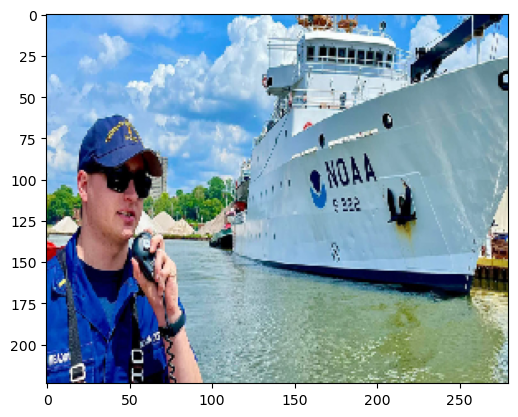

In [70]:
imge = image.load_img('Hdroevans.jpg',target_size = (200, 280)) 
imge1 = image.load_img('NOAA-ship-Okeanos.jpg', target_size = (224, 224))
imge2 = image.load_img('NOAA.jpg', target_size = (224, 224))
imge3 = image.load_img('Ocean glider.jpg', target_size = (224, 224))
imge4 = image.load_img('FA Launch - Arctic - TimSmith.jpg', target_size = (224, 224))
imge5 = image.load_img('NOAA-Image.jpg', target_size = (224, 224))

print(list_of_pred['Hdroevans.jpg'])

plt.imshow(imge)

[('n03673027', 'liner', 0.7358634), ('n03216828', 'dock', 0.099651076), ('n04606251', 'wreck', 0.08795812)]


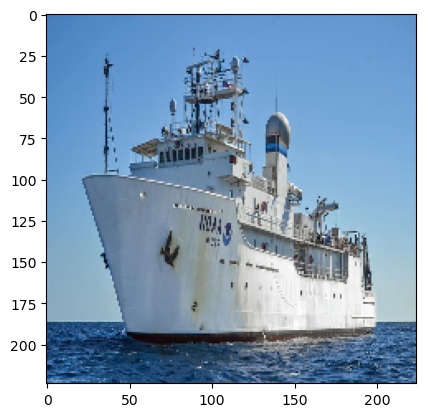

In [34]:
print(list_of_pred['NOAA-ship-Okeanos.jpg'])
plt.imshow(imge1)

[('n04019541', 'puck', 0.21796949), ('n02708093', 'analog_clock', 0.14706993), ('n04328186', 'stopwatch', 0.08948266)]


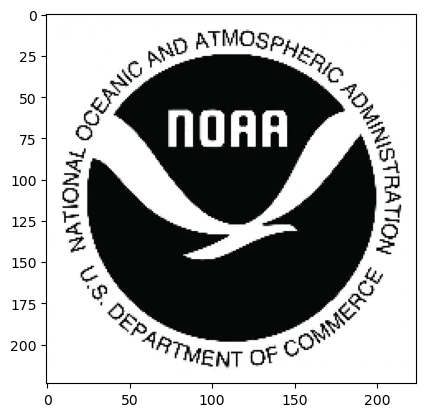

In [35]:
print(list_of_pred['NOAA.jpg'])
plt.imshow(imge2)

[('n04251144', 'snorkel', 0.36659935), ('n04228054', 'ski', 0.17159012), ('n04067472', 'reel', 0.108792566)]


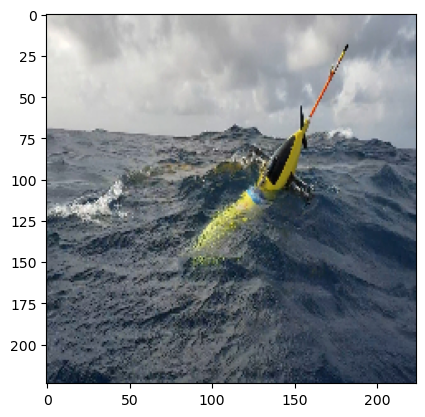

In [36]:
print(list_of_pred['Ocean glider.jpg'])
plt.imshow(imge3)

[('n03710193', 'mailbox', 0.25435203), ('n04507155', 'umbrella', 0.16523576), ('n02910353', 'buckle', 0.048427504)]


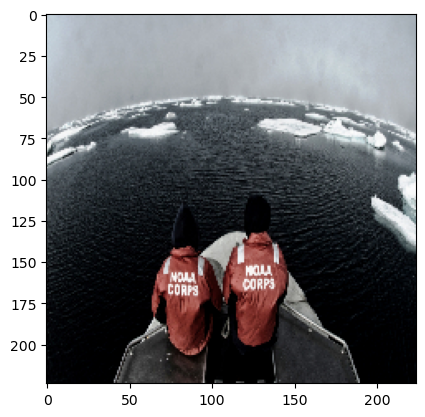

In [37]:
print(list_of_pred['FA Launch - Arctic - TimSmith.jpg'])
plt.imshow(imge4)

[('n04592741', 'wing', 0.69426996), ('n09468604', 'valley', 0.13687006), ('n03733281', 'maze', 0.03614924)]


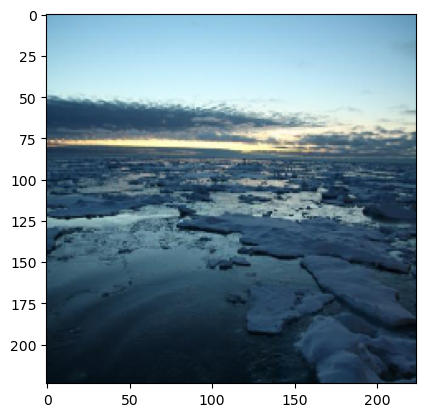

In [39]:
print(list_of_pred['NOAA-Image.jpg'])
plt.imshow(imge5)